# LC Circuits

### We have connected an inductor in a circuit with a capacitor as shown below:

<img src="LCcir.jpg">

### Solution using numerical method

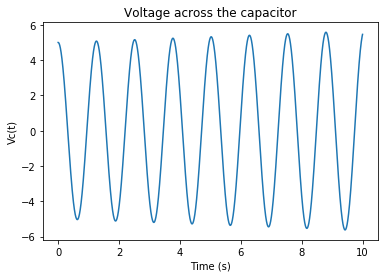

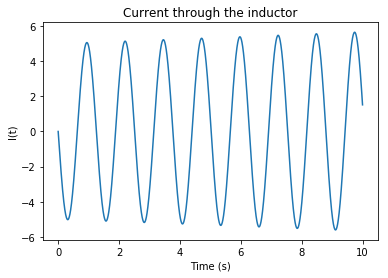

In [48]:
import numpy as np
import matplotlib.pyplot as plt

L = 0.2
C = 0.2
t = np.arange(0, 10, 0.001)
Vc = np.zeros(len(t))
Il = np.zeros(len(t))
Vc[0] = 5
Il[0] = 0
delta = 0.001

for i in range(1,len(t)):
    Vc[i] = Vc[i-1] + (Il[i-1] * delta)/C
    Il[i] = Il[i-1] - (Vc[i-1] * delta)/L

plt.plot(t,Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()

plt.plot(t,Il)
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Current through the inductor')
plt.show()

### Using FFT

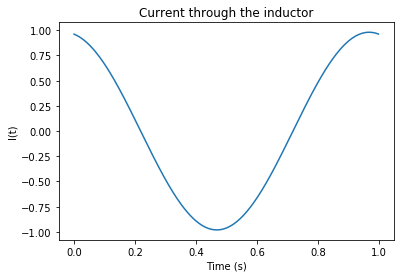

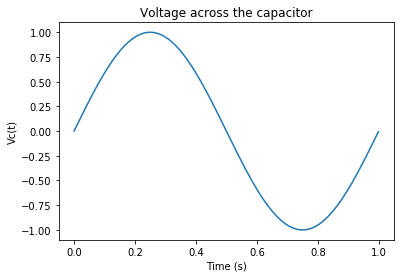

In [51]:
from numpy.fft import fft
from numpy.fft import ifft

L = 0.2
C = 0.2
t = np.arange(0, 1, 0.001)
#Vc= [5] * len(t)
Vc = np.sin(2 * np.pi * 1 * t)
Il = np.zeros(len(t))
#Vc[0] = 5
Il[0] = 0
delta = 0.001

#Applying FFT
N = len(t)
W = np.zeros(N)
W[0 : N/2+1] = np.arange(0, N/2+1)
W[N/2+1 : N] = np.arange(-(N/2-1), 0)
Il = ifft((fft(Vc) * 1j * W * 1/L)/(1/C - 1j * W))

plt.plot(t,Il)
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Current through the inductor')
plt.show()

plt.plot(t,Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()